# Лабораторная работа 3. Визуализация

Мягкий дедлайн 02 ноября 2023 23-59

Жесткий дедлайн 16 ноября 2023 23-59

Версия от 19 октября

## Задание 1. Matplotlib (0.5 балла)

На всех графиках необходимо добавить названия (например,"График 1"), подписи осей или легенды. Для генерации используйте numpy или другую подходящую библиотеку, задавать значения вручную нельзя.

1) (0.1) Сгенерируйте 4 группы по 20 случайных чисел из нормального распределения со средним 1 и дисперсией 1. Постройте линейную диаграмму. В качестве названия осей укажите "Время" и "Значение".  В качестве названий укажите "Категория 1", "Категория 2" и т.д. Используйте подходящие цвета. Для точек разных графиков используйте разные маркеры.

2) (0.1) Сгенерируйте 1000 случайных целых чисел от 1 до 10. Постройте гистограмму и "ящик с усами".

3) (0.1) Сгенерируйте 5 случайных чисел, в сумме дающих 100. Постройте круговую диаграмму. В качестве названий укажите "Категория 1", "Категория 2" и т.д.

4) (0.1) Сгенерируйте 50 случайных точек следующим образом: абсциссы генерируются из нормального распределения со средним 5 и дисперсией 10, ординаты - из нормального распределения со средним 10 и дисперсией 2. Постройте точечную диаграмму. В качестве названия осей укажите "Длина" и "Ширина". Постройте 3 варианта диаграммы: с синими треугольными точками, красными квадратными точками и чёрными точками с любым другим маркером. На третий график добавьте сетку.

5) (0.1) Сгенерируйте 2 набора случайных чисел от 1 до 10 длины 20. Постройте столбчатые диаграммы: одну с вертикальными столбцами, на которой столбцы наборов нарисованы рядом, другую - с горизонтальными столбцами, на которой столбики второго набора добавлены к столбикам первого (stacked).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

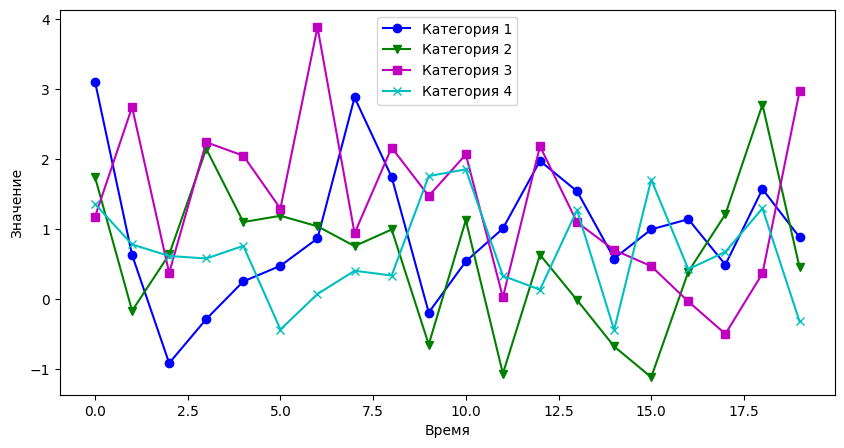

In [2]:
y1 = np.random.normal(loc=1, scale=1, size=20)
y2 = np.random.normal(loc=1, scale=1, size=20)
y3 = np.random.normal(loc=1, scale=1, size=20)
y4 = np.random.normal(loc=1, scale=1, size=20)
plt.figure(figsize=(10,5))
plt.plot(y1, label='Категория 1', marker='o', color='b')
plt.plot(y2, label='Категория 2', marker='v', color='g')
plt.plot(y3, label='Категория 3', marker='s', color='m')
plt.plot(y4, label='Категория 4', marker='x', color='c')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()

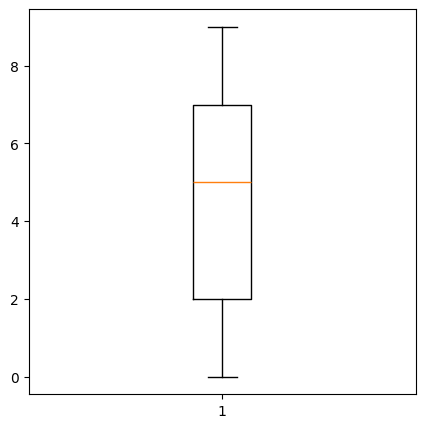

In [3]:
a = np.random.randint(0, 10, 1000)

fig = plt.figure(figsize =(5, 5))
plt.boxplot(a)
plt.show()

([<matplotlib.patches.Wedge at 0x2759de2d360>,
 [Text(1.065441473697734, 0.27355888968337483, 'Категория 1'),
  Text(0.9097886288026013, 0.6182917199037059, 'Категория 2'),
  Text(0.5599456090187194, 0.9468161991329973, 'Категория 3'),
  Text(-4.8082529002048655e-08, 1.099999999999999, 'Категория 4'),
  Text(-0.7011662130500308, -0.8475647123831188, 'Категория 5')])

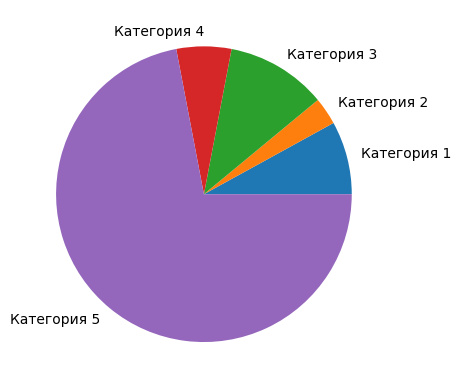

In [38]:
values = np.random.randint(0, 25, 4)
values = np.append(values, 100-values.sum())

labels = ['Категория 1', 'Категория 2', 'Категория 3', 'Категория 4', 'Категория 5']

fig, ax = plt.subplots()
ax.pie(values, labels=labels)

Text(0, 0.5, 'Ширина')

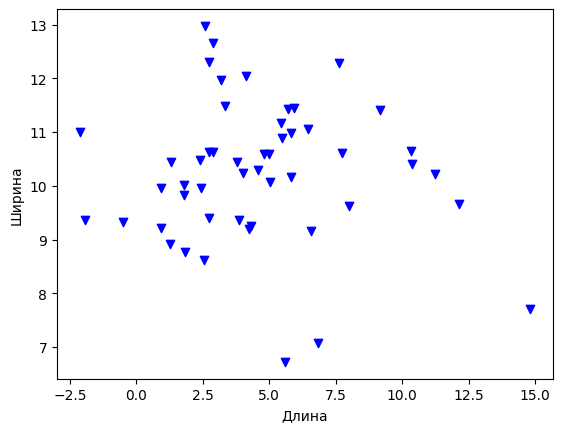

In [49]:
x = np.random.normal(loc=5, scale=10**0.5, size=50)
y = np.random.normal(loc=10, scale=2**0.5, size=50)
plt.scatter(x, y, c='b', marker='v')
plt.xlabel('Длина')
plt.ylabel('Ширина')

Text(0, 0.5, 'Ширина')

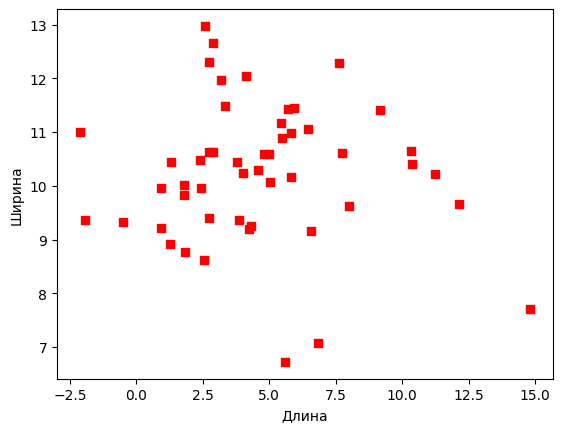

In [50]:
plt.scatter(x, y, c='r', marker='s')
plt.xlabel('Длина')
plt.ylabel('Ширина')

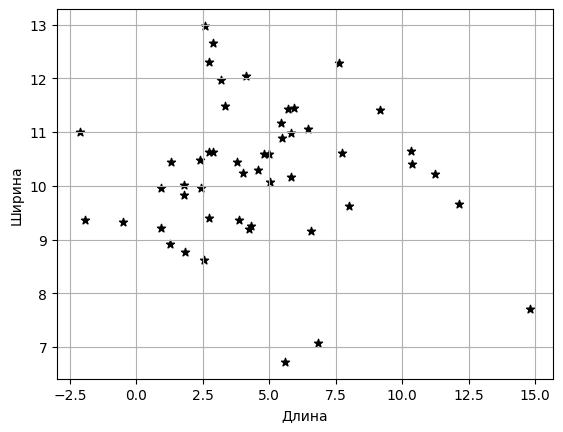

In [51]:
plt.scatter(x, y, c='k', marker='*')
plt.xlabel('Длина')
plt.ylabel('Ширина')
plt.grid()

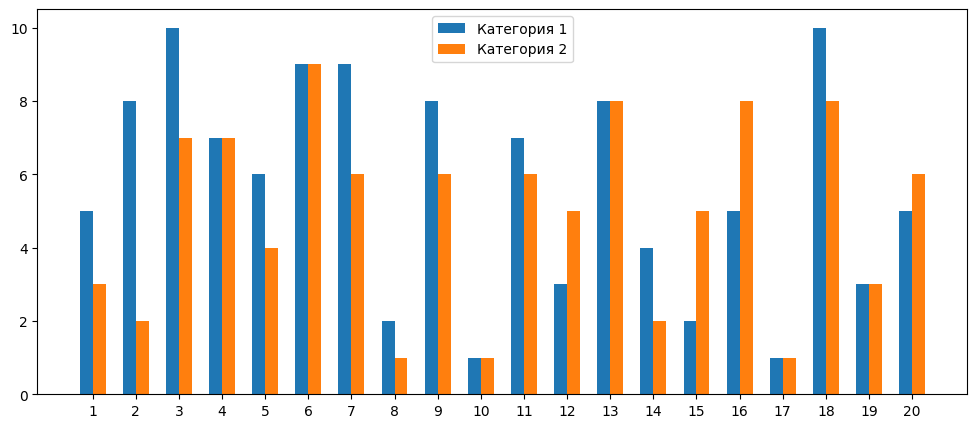

In [55]:
h = np.arange(1, 21)
group1 = np.random.randint(1, 11, 20)
group2 = np.random.randint(1, 11, 20)

w = 0.3
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(h - w/2, group1, width=w, label='Категория 1')
ax.bar(h + w/2, group2, width=w, label='Категория 2')
ax.set_xticks(h)
ax.legend()

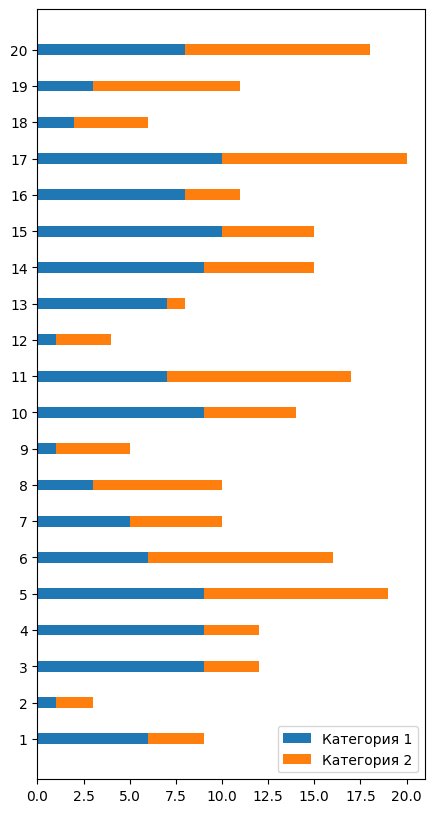

In [53]:
fig, ax = plt.subplots(figsize=(5, 10))
ax.barh(h, group1, height=w, label='Категория 1')
ax.barh(h, group2, left=group1, height=w, label='Категория 2')
ax.set_yticks(h)
ax.legend()

## Задание 2. cv2 (0.6 балла)

Дано изображение кошки. Сегментируйте кошку, не используя нейросетевые технологии. Можно использовать бинаризацию, морфологические операции, фильтры и другие достаточно простые преобразования. Исправлять картинку руками нельзя.

Примечание: допускается "неидеальный" результат

Указание

1) Сделайте картинку одноканальной, выбрав проекцию, которая лучше всего разделяет фон и объект. Можете использовать цветовые гистограммы.

2) После этого примените бинаризацию и морфологические операции.

3) Получите маску. Наложите маску на картинку, чтобы показать результат сегментации.


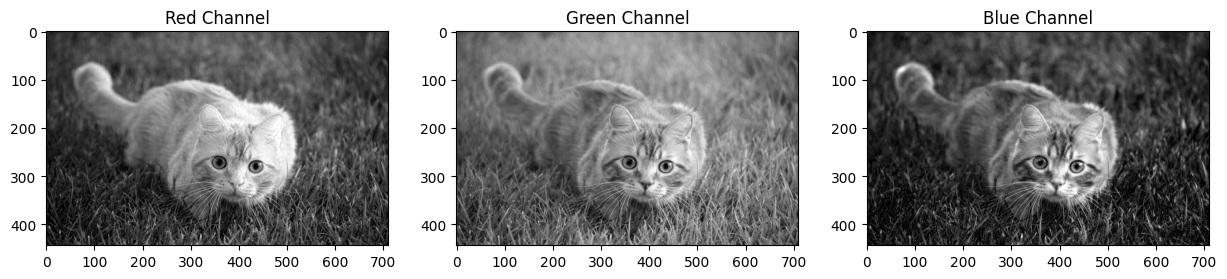

In [10]:
import cv2

image = cv2.imread("cat.jpg",cv2.IMREAD_COLOR)
r,g,b = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(r,cmap='gray');plt.title("Red Channel")
plt.subplot(132);plt.imshow(g,cmap='gray');plt.title("Green Channel")
plt.subplot(133);plt.imshow(b,cmap='gray');plt.title("Blue Channel")
plt.show()


Красный канал лучше разделяет траву и котика.

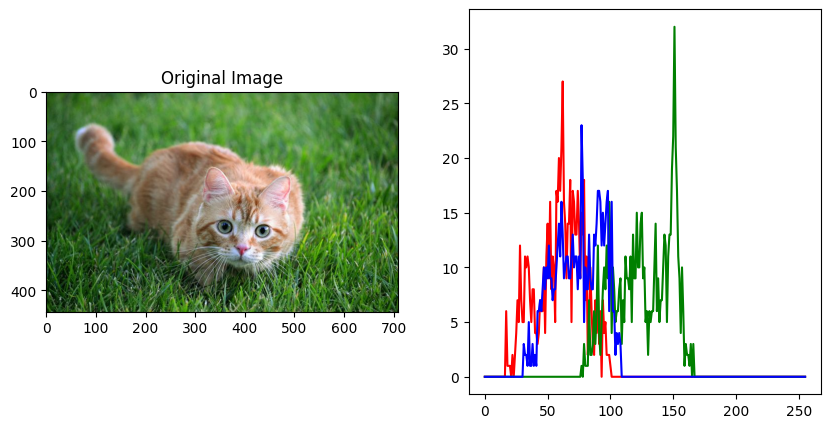

In [11]:
channels = cv2.split(image)
colors = ('r', 'g', 'b')

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(122)
for channel, color in zip((b, g, r), colors):
    histogram = cv2.calcHist(channel, [0], None, [256], [0, 256])
    plt.plot(histogram, color=color, label=color)

<function matplotlib.pyplot.show(close=None, block=None)>

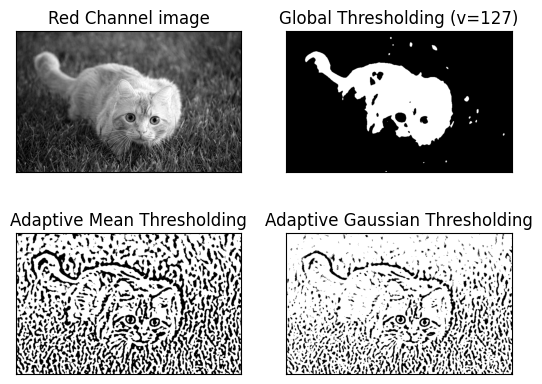

In [ ]:
blurred = cv2.GaussianBlur(r, (15, 15), 0)
_, th1 = cv2.threshold(blurred, 0, 255,  cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
th2 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Red Channel image', 'Global Thresholding (v=127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [r, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'grey')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show

Обычная пороговая бинаризация с бинаризацией Оцу дала лучший результат разделяемости котика и фона. Поэтому далее будем использовать этот способ.

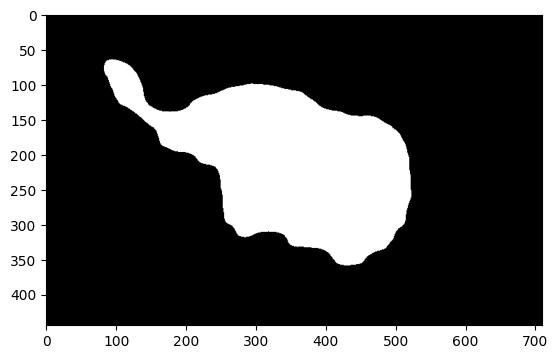

In [131]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
morph1 = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55, 25))
morph2 = cv2.morphologyEx(morph1, cv2.MORPH_CLOSE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,15))
morph3 = cv2.morphologyEx(morph2, cv2.MORPH_OPEN, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,55))
morph4 = cv2.morphologyEx(morph3, cv2.MORPH_CLOSE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,25))
morph5 = cv2.morphologyEx(morph4, cv2.MORPH_OPEN, kernel)

plt.imshow(morph5, 'gray')


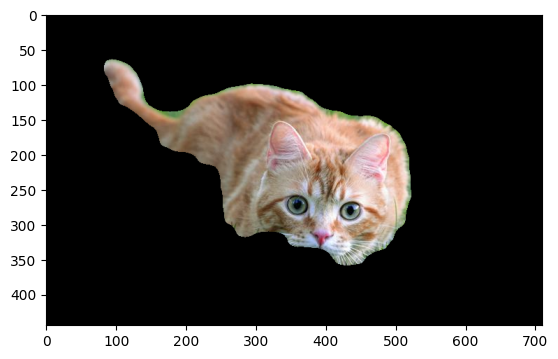

In [130]:
mask = morph5
masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))

Нижняя часть кота, к сожалению, пострадала :(

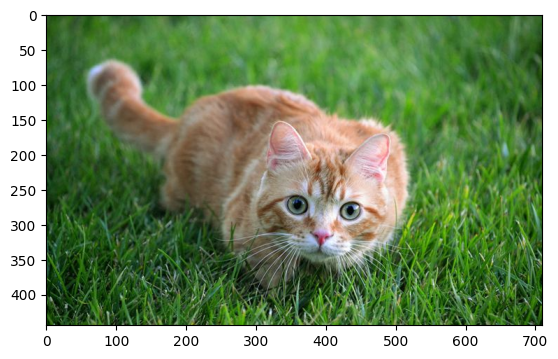

In [57]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


## Задание 3. pandas + matplotlib (0.6 балла)

Вам предлагается поработать с датасетом морских ушек

In [17]:
import pandas as pd
url = (
     "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
 )
abalone = pd.read_csv(url, header=None)
abalone.columns = [
     "Sex",
     "Length",
     "Diameter",
     "Height",
     "Whole weight",
     "Shucked weight",
     "Viscera weight",
     "Shell weight",
     "Rings",
]

1) (0.1) С помощью pandas посчитайте корреляцию значений колонок. Нарисуйте точечные диаграммы для 3 наиболее коррелирующих пар признаков.  Используйте серые точки с прозрачностью alpha=0.2. Добавьте сетку. (0.1) Через метод наименьших квадратов постройте линейные приближения этих графиков, добавьте на графики линии.

2) (0.1) Постройте "ящики с усами" для каждого признака. Для категориальных признаков постройте столбчатые диаграммы. Признаков всего 9, так что их можно расположить в виде таблички 3 на 3. Используйте subplots, чтобы поместить всё на один график.

3) (0.2) Нарисуйте график зависимости параметров 'Height' и 'Viscera weight'. Удалите выбросы. Перерисуйте график, добавьте параметр 'Rings' для определения цвета точки. Проделайте то же самое только для 50 случайно выбранных точек. Сделайте вывод об информативности графика.

4) (0.1) Нарисуйте график зависимости параметров 'Height', 'Viscera weight' и 'Rings' в 3D. Для определения цвета точки используйте 'Rings'. Сделайте вывод об информативности графика.

Во всех заданиях не забывайте про подписи графиков и осей!



In [18]:
abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [62]:
%pip install dython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


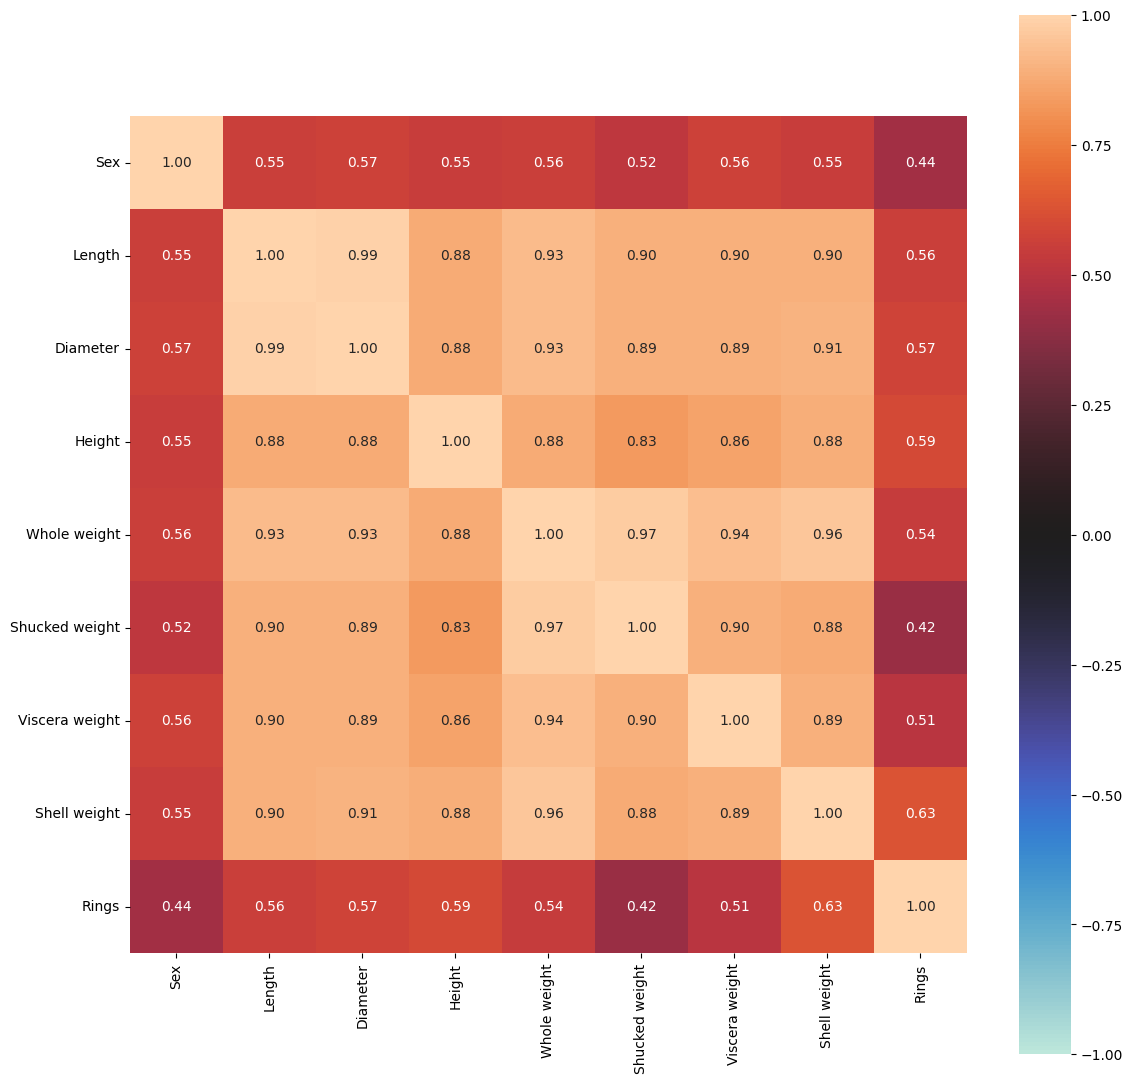

{'corr':                      Sex    Length  Diameter    Height  Whole weight  \
 Sex             1.000000  0.554778  0.567924  0.554615      0.559497   
 Length          0.554778  1.000000  0.986812  0.875202      0.925261   
 Diameter        0.567924  0.986812  1.000000  0.882628      0.925452   
 Height          0.554615  0.875202  0.882628  1.000000      0.881528   
 Whole weight    0.559497  0.925261  0.925452  0.881528      1.000000   
 Shucked weight  0.522417  0.897914  0.893162  0.829892      0.969405   
 Viscera weight  0.564904  0.895818  0.893044  0.856081      0.936141   
 Shell weight    0.550140  0.897706  0.905330  0.884456      0.955355   
 Rings           0.439393  0.556720  0.574660  0.594727      0.540390   
 
                 Shucked weight  Viscera weight  Shell weight     Rings  
 Sex                   0.522417        0.564904      0.550140  0.439393  
 Length                0.897914        0.895818      0.897706  0.556720  
 Diameter              0.893162       

In [63]:
from dython.nominal import associations

associations(abalone)

In [19]:
correlation_matrix = abalone.drop(columns='Sex').corr()
print(correlation_matrix)

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

Коррелирующие признаки: 
* 'Length' 'Diameter'
* 'Whole weight' 'Shucked weight'
* 'Whole weight' 'Viscera weight'

In [20]:
def approx(x, y):
    N = len(x)
    mx = x.sum()/N
    my = y.sum()/N
    a2 = np.dot(x.T, x)/N
    a11 = np.dot(x.T, y)/N

    kk = (a11 - mx*my)/(a2 - mx**2)
    bb = my - kk*mx
    return np.array(kk*x+bb)

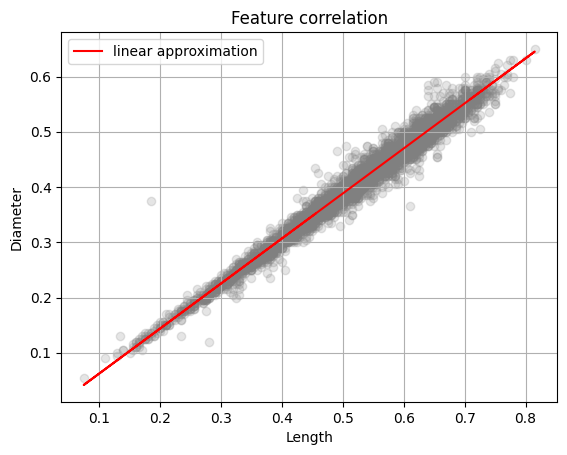

In [64]:
z = approx(abalone['Length'], abalone['Diameter'])

plt.scatter(abalone['Length'], abalone['Diameter'], c='grey', alpha=0.2)
plt.plot(abalone['Length'], z, color='r', label='linear approximation')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Feature correlation')
plt.legend()
plt.grid()

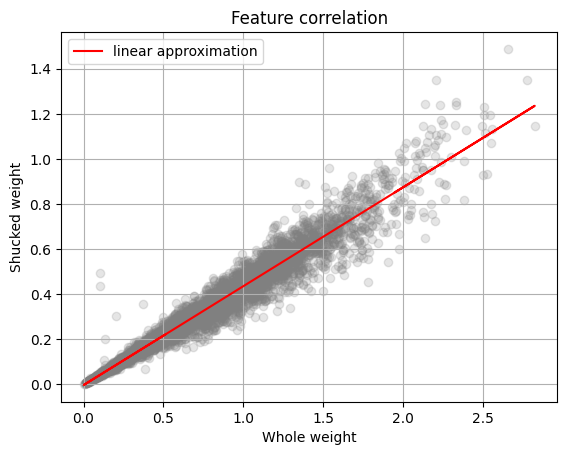

In [65]:
z = approx(abalone['Whole weight'], abalone['Shucked weight'])

plt.scatter(abalone['Whole weight'], abalone['Shucked weight'], c='grey', alpha=0.2)
plt.plot(abalone['Whole weight'], z, color='r', label='linear approximation')
plt.xlabel('Whole weight')
plt.ylabel('Shucked weight')
plt.title('Feature correlation')
plt.legend()
plt.grid()

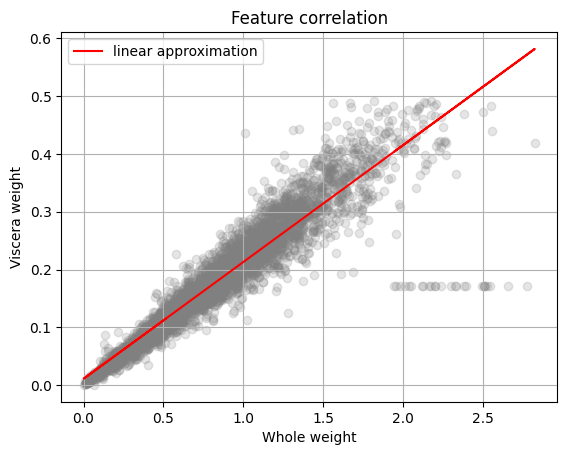

In [66]:
z = approx(abalone['Whole weight'], abalone['Viscera weight'])

plt.scatter(abalone['Whole weight'], abalone['Viscera weight'], c='grey', alpha=0.2)
plt.plot(abalone['Whole weight'], z, color='r', label='linear approximation')
plt.xlabel('Whole weight')
plt.ylabel('Viscera weight')
plt.title('Feature correlation')
plt.legend()
plt.grid()

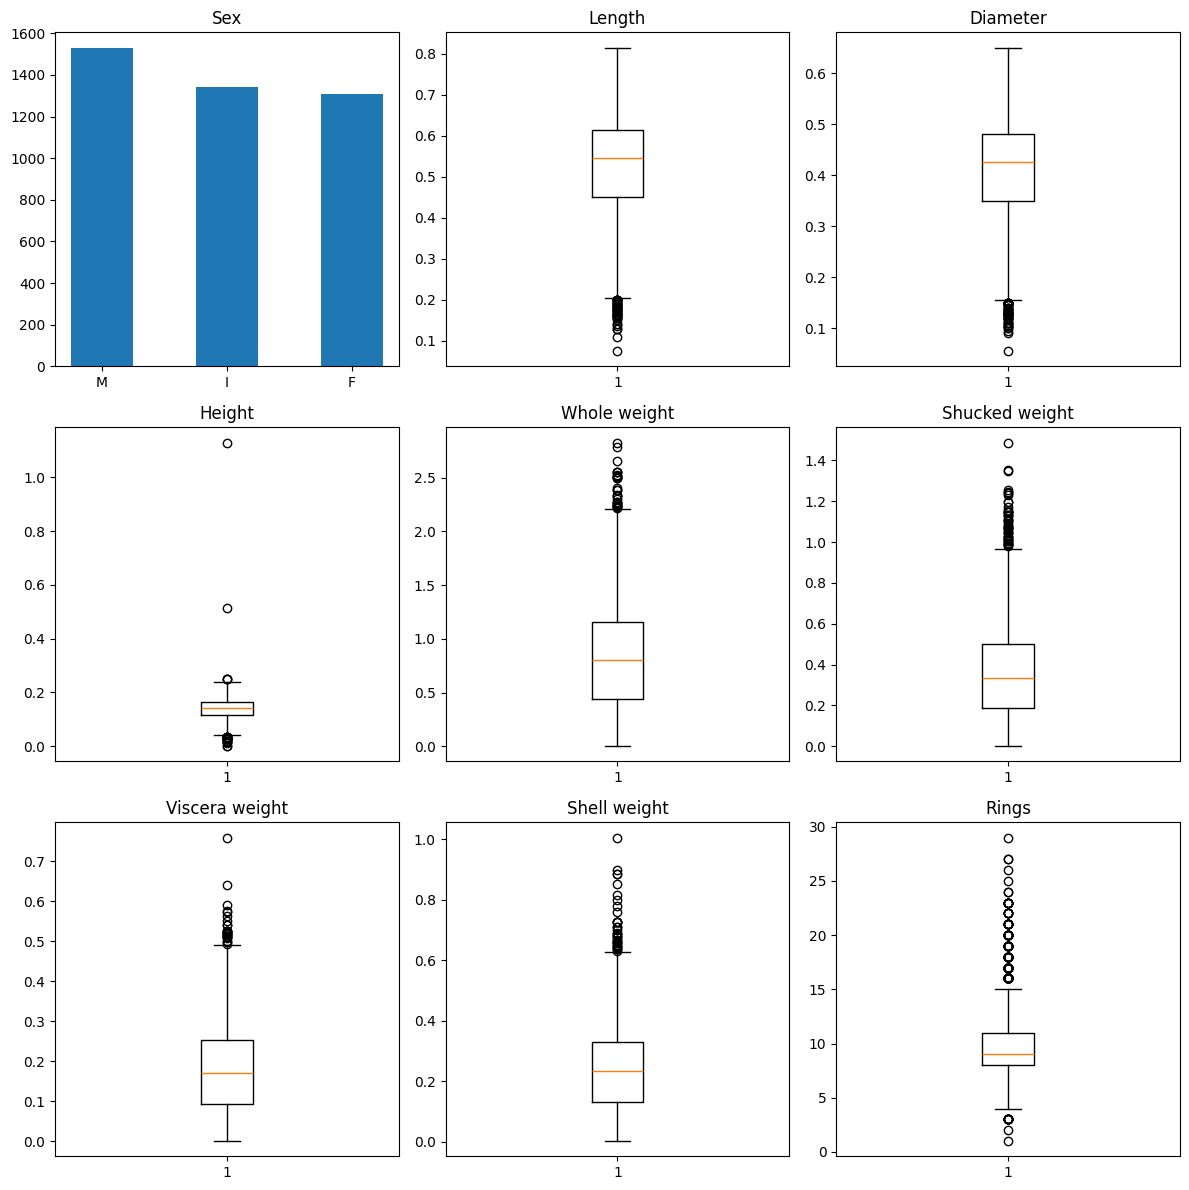

In [27]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 3, 1)
plt.bar(['M', 'I', 'F'], np.array(abalone['Sex'].value_counts()), width=0.5)
plt.title('Sex')
col = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
for i in range(2, 10):
    plt.subplot(3, 3, i)
    plt.boxplot(abalone[col[i-2]])
    plt.title(col[i-2])
    plt.tight_layout()
plt.show()


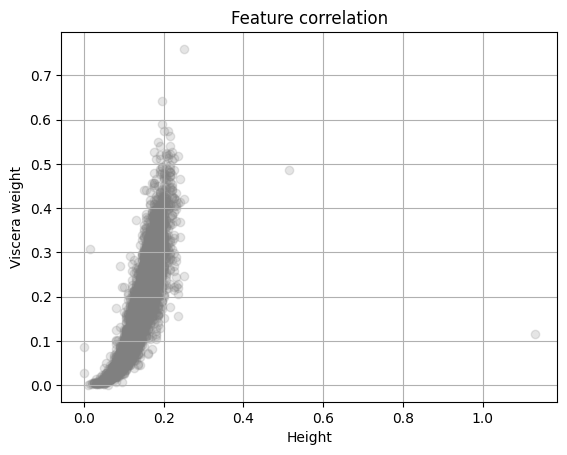

In [28]:
plt.scatter(abalone['Height'], abalone['Viscera weight'], c='grey', alpha=0.2)
plt.xlabel('Height')
plt.ylabel('Viscera weight')
plt.title('Feature correlation')
plt.grid()

Удалим выбросы

In [73]:
for col_name in ['Height', 'Viscera weight']:
    q1 = abalone[col_name].quantile(0.25)
    q3 = abalone[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr

    abalone = abalone[(abalone[col_name] >= low) & (abalone[col_name] <= high)]

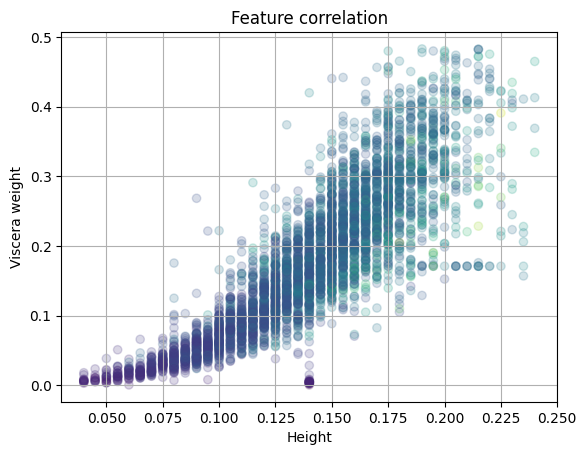

In [75]:
plt.scatter(abalone['Height'], abalone['Viscera weight'], c=abalone['Rings'], alpha=0.2, label=abalone['Rings'])
plt.xlabel('Height')
plt.ylabel('Viscera weight')
plt.title('Feature correlation')
#plt.legend()
plt.grid()

Похоже на квадратичную зависимость признаков, особенно при малых значениях. То есть признаки 'Viscera weight' и 'Height' не являюся независимыми.

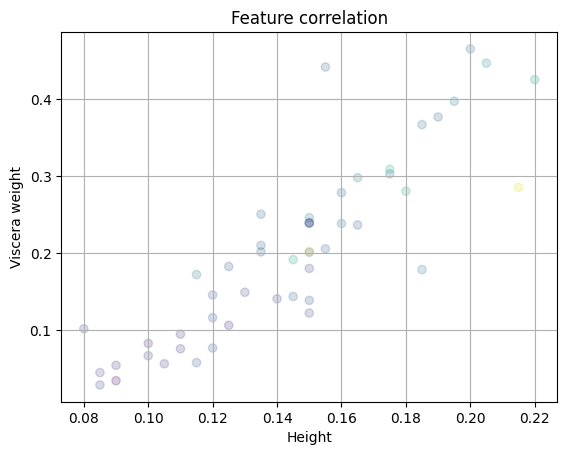

In [76]:
idx_list = np.random.randint(0, len(abalone), 50)
x, y, color = [], [], []
for idx in idx_list:
    x.append(abalone['Height'][idx])
    y.append(abalone['Viscera weight'][idx])
    color.append(abalone['Rings'][idx])

plt.scatter(x, y, c=color, alpha=0.2, label=abalone['Rings'])
plt.xlabel('Height')
plt.ylabel('Viscera weight')
plt.title('Feature correlation')
#plt.legend()
plt.grid()

На 50 случайно выбранных точках нелинейная зависимость признаков 'Height' и 'Viscera weight' не прослеживается. То есть при такой малой случайной выборке пропадает информация о нелинейной зависимости признаков.

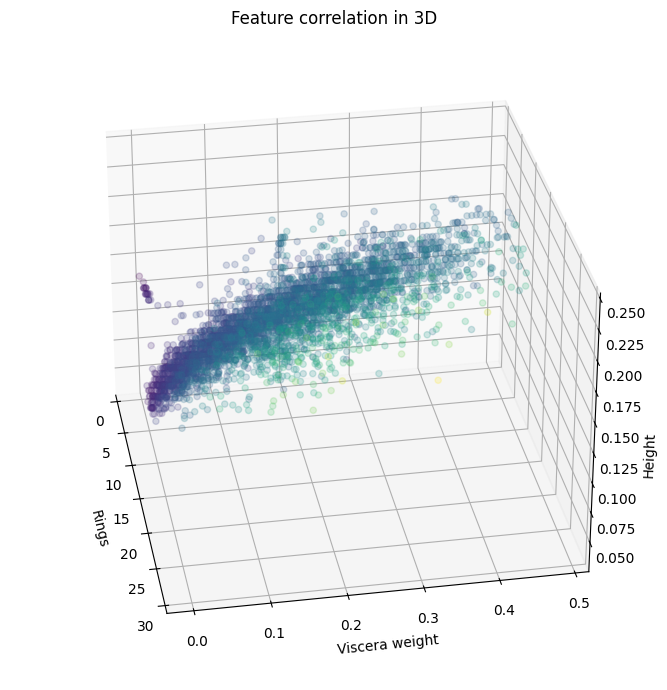

In [81]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter( abalone['Rings'], abalone['Viscera weight'],abalone['Height'], c=abalone['Rings'], alpha=0.2)
ax.set_xlabel('Rings')
ax.set_ylabel('Viscera weight')
ax.set_zlabel('Height')
ax.view_init(30, -10)
plt.title('Feature correlation in 3D')
fig.tight_layout()

При малых значениях признаков 'Height' и 'Viscera weight' (соответствует малым значениям 'Rings' - цвет фиолетовый) зависимость имеет нелинейных характер. На бОльших значениях признаков 'Height' и 'Viscera weight' зависиость становится почти линейной (соответствует бОльшим значениям 'Rings' - цвет бирюзовый).

## Задание 4. seaborn

1) (0.1) Используя pairplot, нарисуйте диаграмму для датасета морских ушек. Используйте пол ушка для определения цвета. По диагонали нарисуйте гистограммы. Сделайте вывод об информативности графика.

2) (0.1) Используя boxplot, нарисуйте ящики с усами для параметров 'Height' и 'Shell weight', в качестве параметра цвета передавайте пол ушка. Сделайте вывод об информативности графика. (0.1) Придумайте, как сделать график более читаемым.






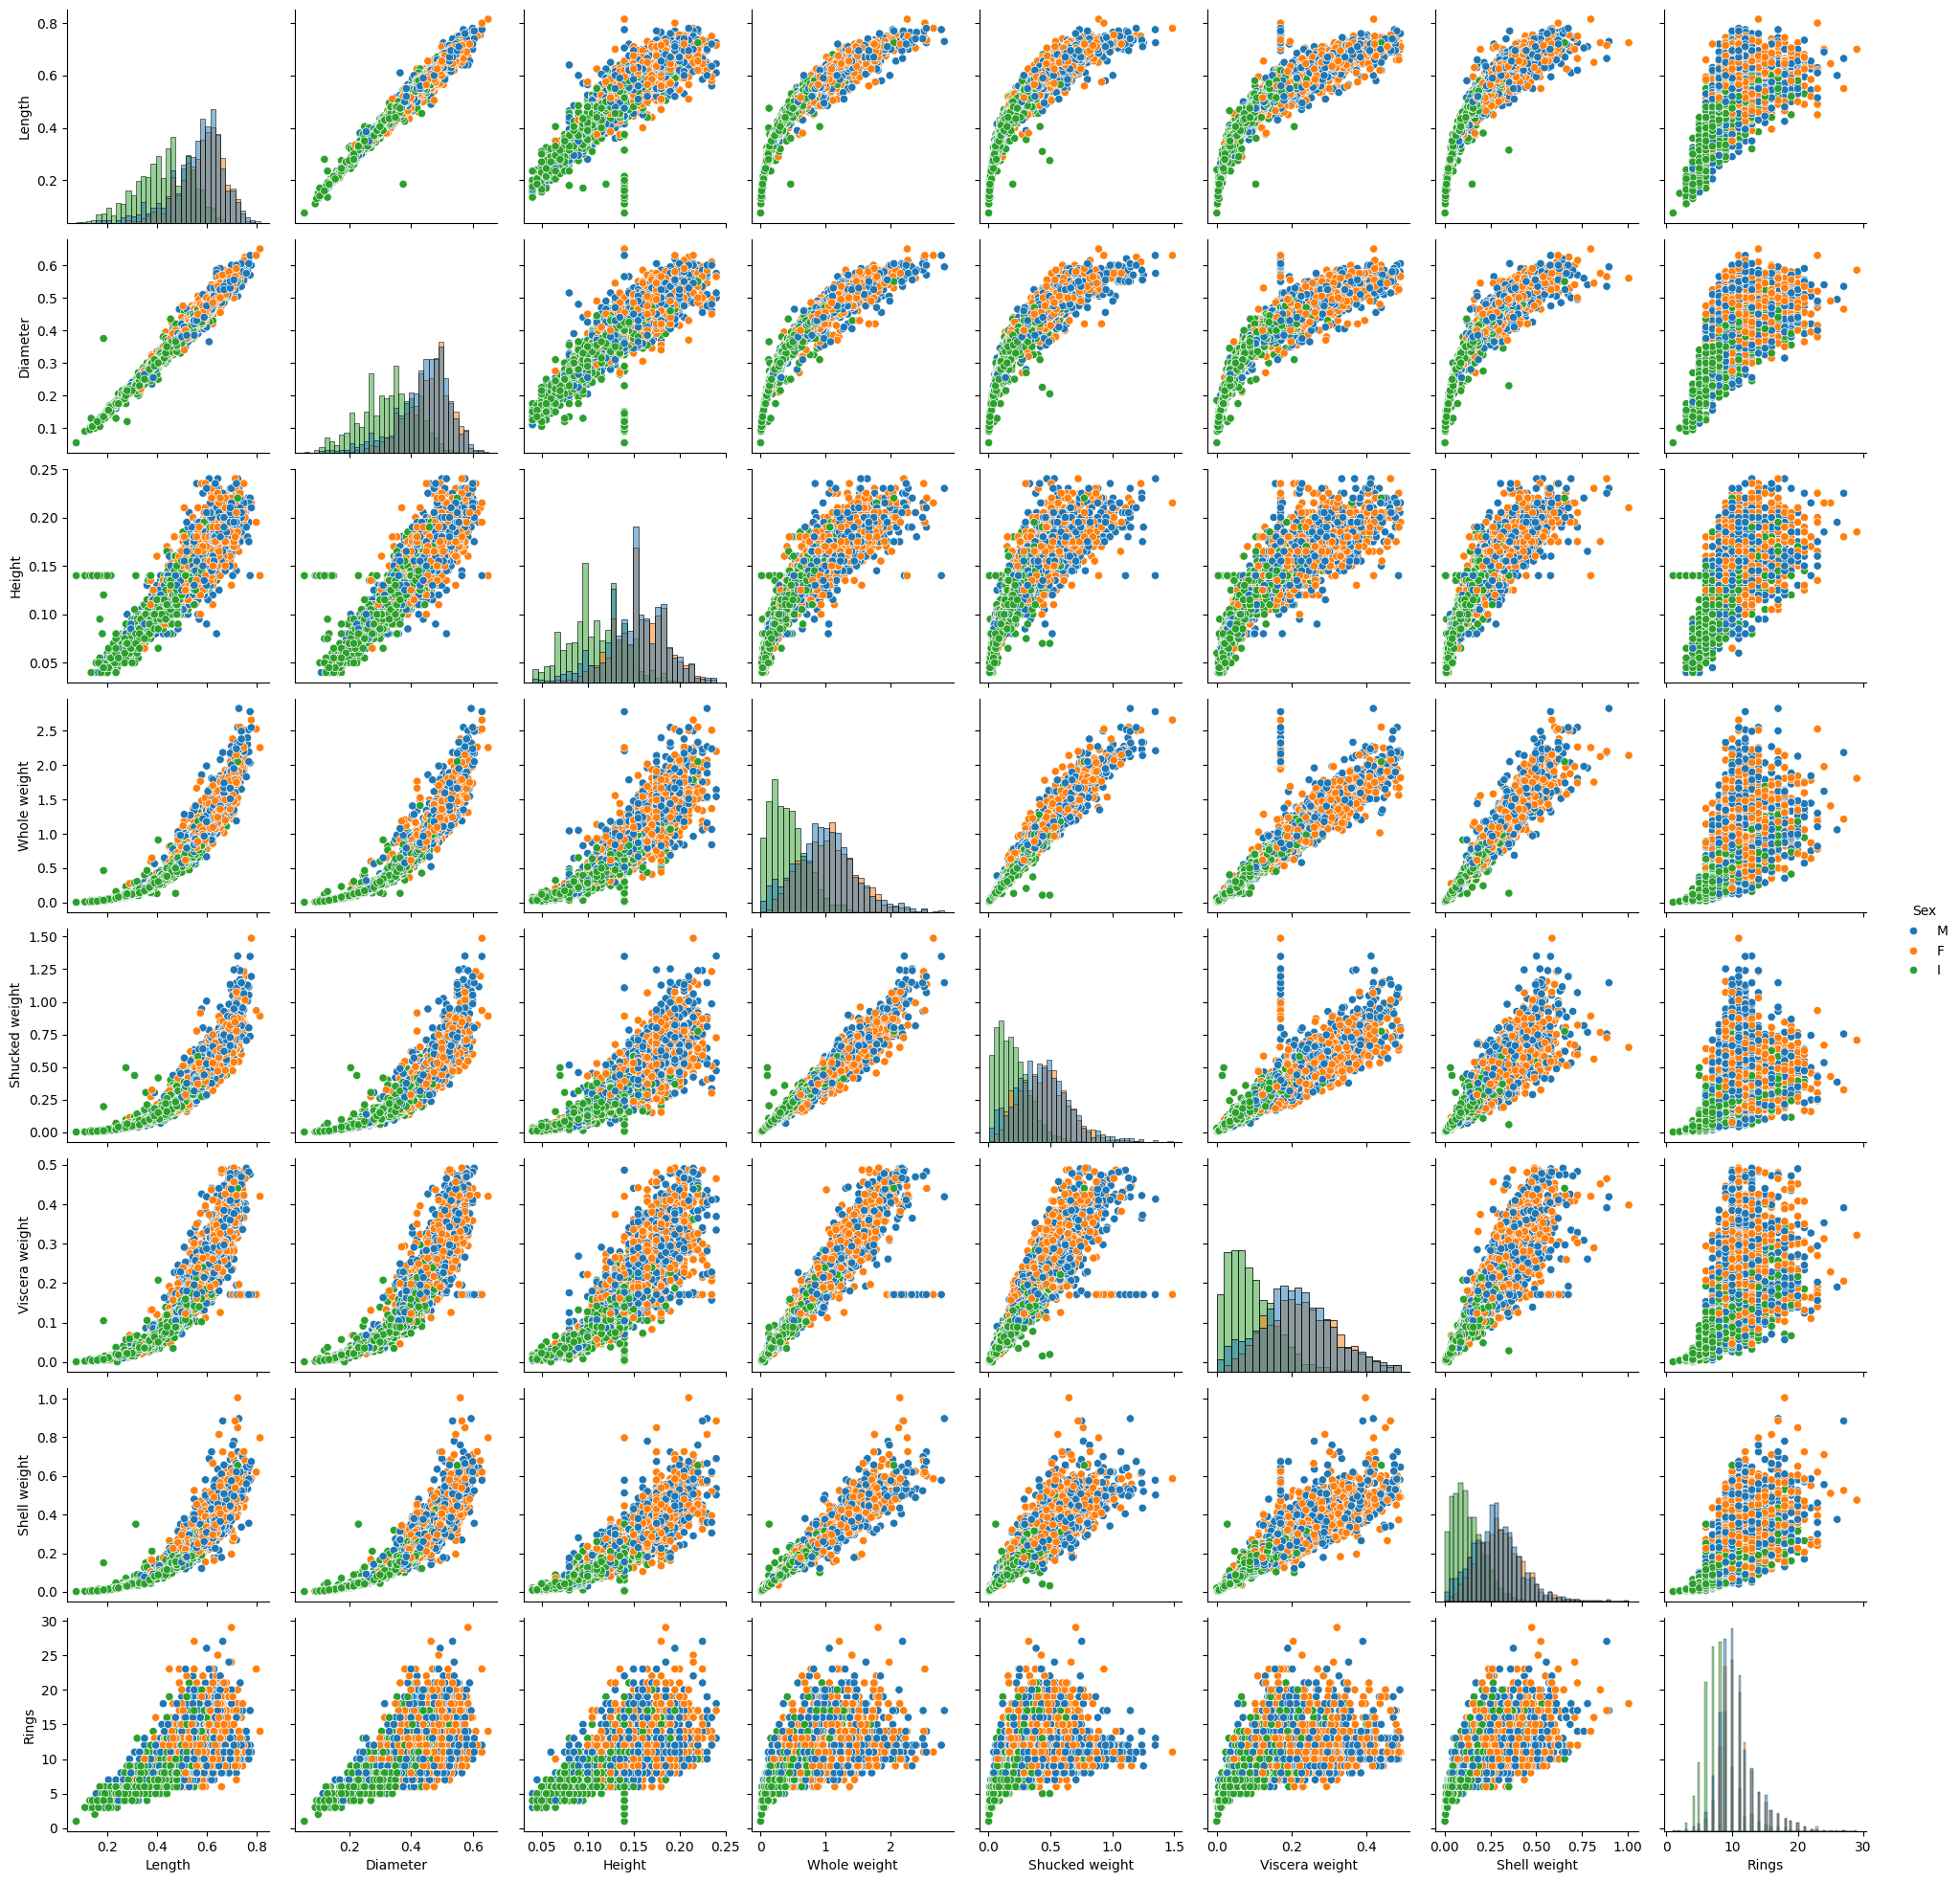

In [33]:
import seaborn as sns

sns.pairplot(abalone, hue='Sex', diag_kind='hist')

Как видно из графика, многие признаки имеют либо линейную, либо квадратичную зависимость. Также можно заметить, что на малых значениях всех признаков преобладает пол 'I'.

В качетсве добавки информативности добавим метки среднего значения на график.

<Axes: xlabel='Height'>

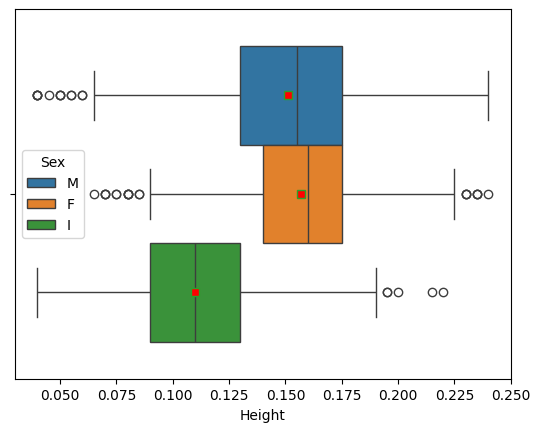

In [83]:
sns.boxplot(data=abalone, x='Height', hue='Sex', showmeans=True, meanprops={'marker': 's', 'markerfacecolor': 'r'})

Рост у молодых особей меньше взрослых, медианное значение находится в районе 0.112 (mm). Медианное значение роста взрослых особей женского пола больше, чем у взрослых особей мужского пола. Интерквантильный размах и разброс значений роста особей мужского пола, большего того же для особей женского пола.

<Axes: xlabel='Shell weight'>

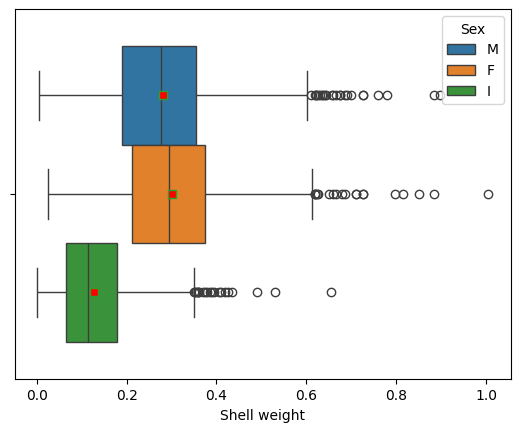

In [84]:
sns.boxplot(data=abalone, x='Shell weight', hue='Sex', showmeans=True, meanprops={'marker': 's', 'markerfacecolor': 'r'})

Вес раковины у молодых особей меньше взрослых, медианное значение находится в районе 0.12 (grams). Интерквантильный размах и разброс значений веса раковины молодых особей меньше, чем у взрослых.
Медианное значение веса раковины взрослых особей женского пола в районе 0.3 (grams).
Медианное значение веса раковины взрослых особей женского пола больше, чем у взрослых особей мужского пола.

## Задание 5. subplots

1) (0.1) Сделайте график, на котором будет 9 подграфиков, расположенных в виде таблицы 3 на 3. На каждом графике нарисуйте график функции $x^i$ , где i - номер графика, от 1 до 9. Сделайте подписи к каждому подграфику и ко всему графику.

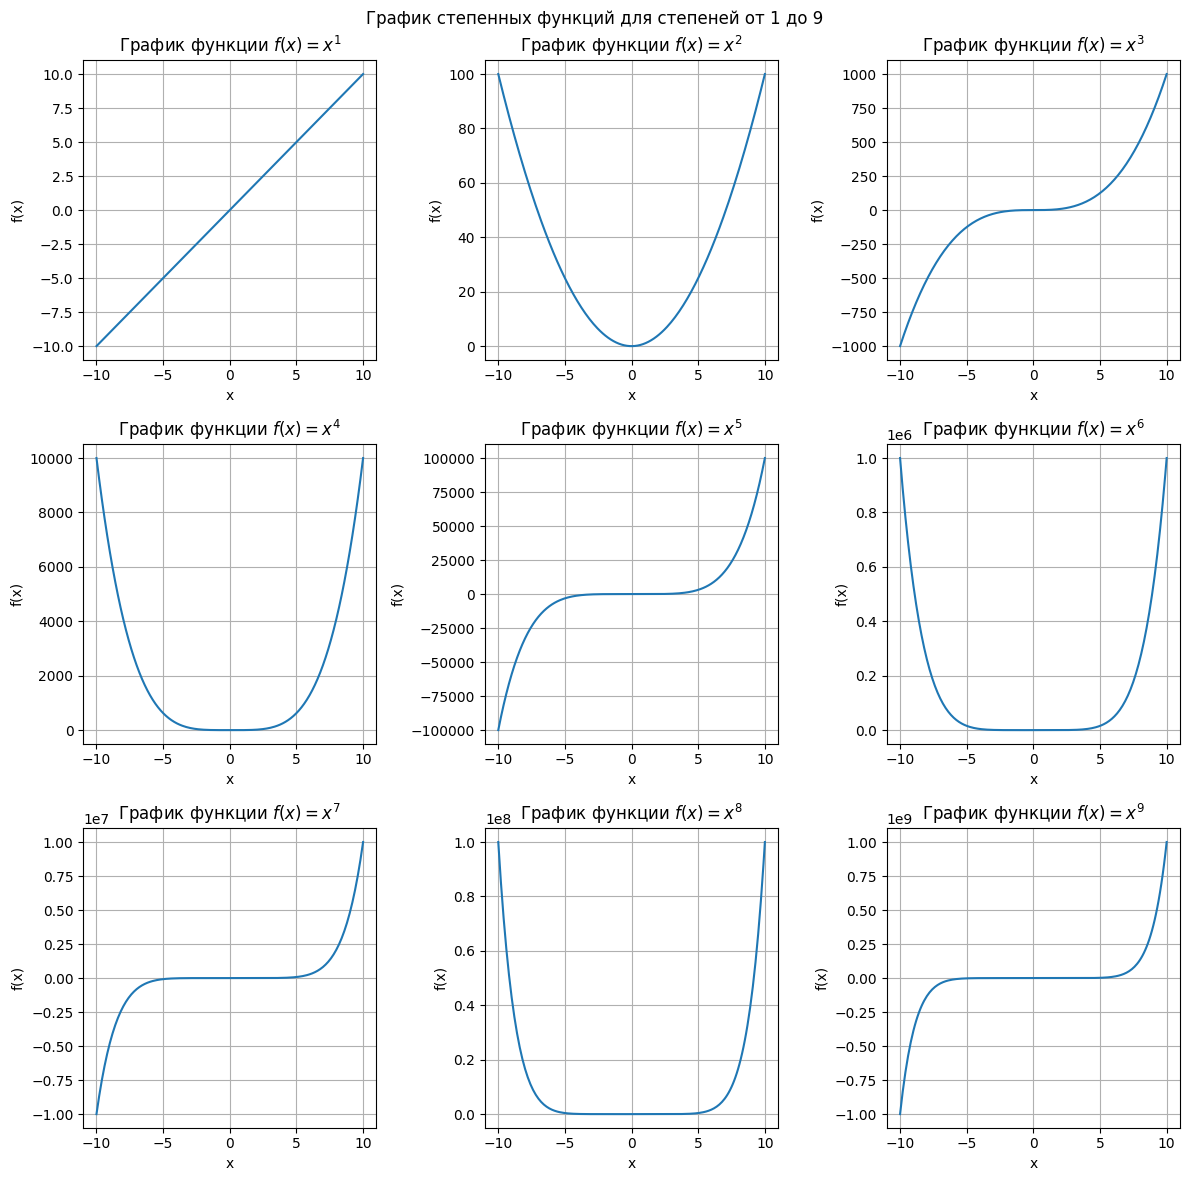

In [36]:
x = np.linspace(-10, 10, 200)
plt.figure(figsize=(12, 12))
plt.suptitle('График степенных функций для степеней от 1 до 9')
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.plot(x, x**(i))
    plt.title (f'График функции $f(x)=x^{i}$')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.tight_layout()
plt.show()
